In [1]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 13.0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# Load your dataset (replace with your file path if needed)
file_path = '/Users/JOOYEON/Documents/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1. Introduction to the Telco Dataset

The dataset used for this project is a customer analytics dataset from a telecom company which the original dataset was extracted from https://www.kaggle.com/datasets/palashfendarkar/wa-fnusec-telcocustomerchurn. The dataset has 7,032 records and 21 columns, including both bases and descriptibe variables. The attributes of each dataset is as given below.

* <code>customerID</code> - Customer ID

* <code>gender</code> - Whether the customer is a male or a female

* <code>SeniorCitizen</code> - Whether the customer is a senior citizen (1, 0)

* <code>Partner</code> - Whether the customer has a partner (Yes, No)

* <code>Dependents</code> - Whether the customer has dependents (Yes, No)

* <code>tenure</code> - Number of months the customer has stayed with the company

* <code>PhoneService</code> - Whether the customer has a phone service (Yes, No)

* <code>MultipleLines</code> - Whether the customer has multiple lines (Yes, No, No phone service)

* <code>InternetService</code> - Customer’s internet service provider (DSL, Fiber optic, No)

* <code>OnlineSecurity</code> - Whether the customer has online security (Yes, No, No internet service)

* <code>OnlineBackup</code> - Whether the customer has online backup or not (Yes, No, No internet service)

* <code>DeviceProtection</code> - Whether the customer has device protection (Yes, No, No internet service)

* <code>TechSupport</code> - Whether the customer has tech support (Yes, No, No internet service)

* <code>StreamingTV</code> - Whether the customer has streaming TV service (Yes, No, No internet service)

* <code>StreamingMovies</code> - Whether the customer has streaming movies service (Yes, No, No internet service)

* <code>Contract</code> - Indicates the type of the contract (Month-to-month, One year, Two year)

* <code>PaperlessBilling</code> - Whether the customer has paperless billing (Yes, No)

* <code>PaymentMethod</code> - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* <code>MonthlyCharges</code> - Indicates the current monthly subscription cost of the customer

* <code>TotalCharges</code> - Indicates the total charges paid by the customer so far

* <code>Churn</code> - Indicates whether the customer churned

## 2. Exploratory Data Analysis

Before diving into data cleansing & pre-processing, we will analyze and investigate data sets and their main characteristics.

In [28]:
# Checking duplicated values¶
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7032, dtype: bool

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Since the dataset contains too many 'object' type variables, we will convert the type later in Data Cleansing & Preprocess step.

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

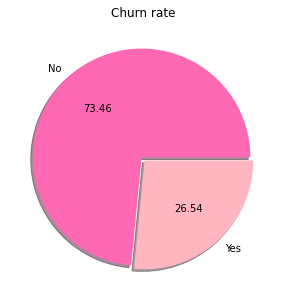

In [9]:
plt.figure(figsize=(5,5))
plt.title("Churn rate")
explodes=[0.02,0.02]
plt.pie(df.Churn.value_counts(),shadow=True,explode=explodes, labels= df.Churn.value_counts().keys(), autopct = "%.2f", colors= ['hotpink', 'lightpink'])
plt.show()

## 3. Data Preprocessing

In order to make the raw dataset ideal for the customer analytical techniques we will use later, we will conduct data preprocessing in the following steps.

### 3.1 Dropping Missing Values

In [10]:
# Changing data type of TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].replace(' ','0').astype(float) 

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.loc[df.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


Filter and display rows where the value of the column TotalCharges is equal to zero. We will drop these rows.

In [13]:
df = df.loc[df['TotalCharges'] != 0]

In [14]:
df.loc[df.TotalCharges == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Now the rows with TotalCharges = 0 are all dropped.

In [15]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### 3.2 Changing Data Type

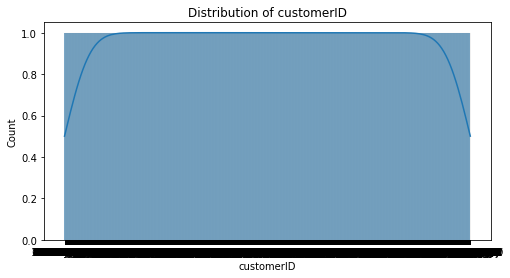

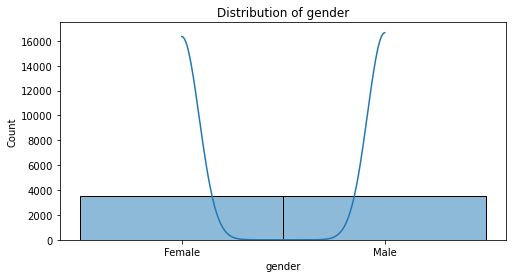

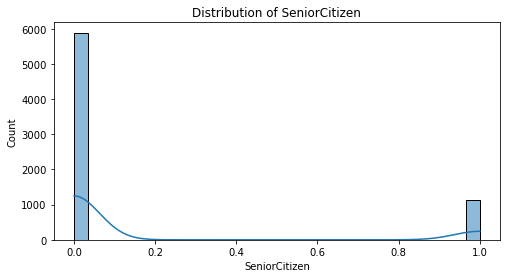

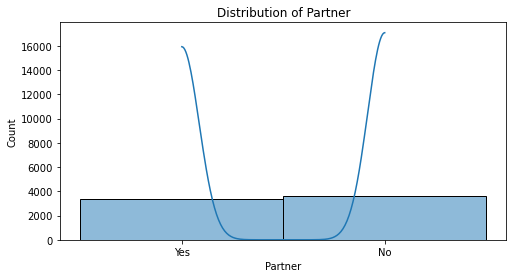

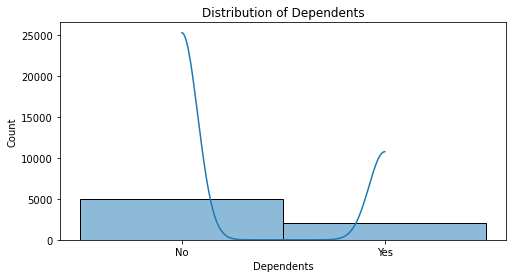

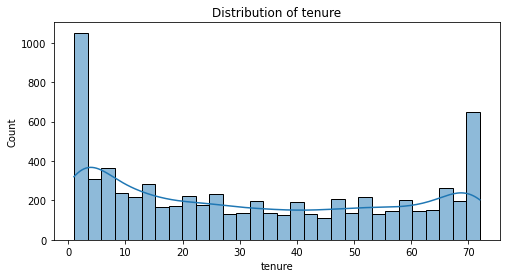

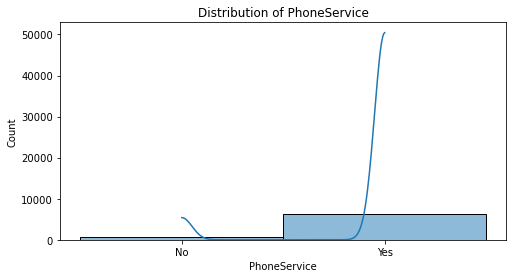

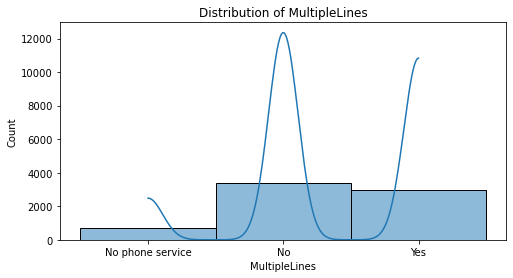

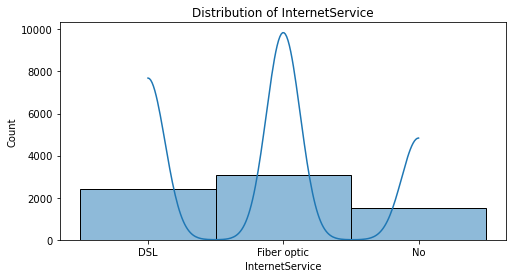

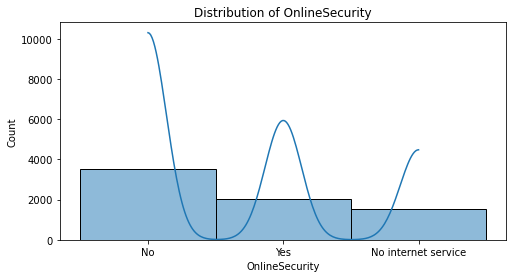

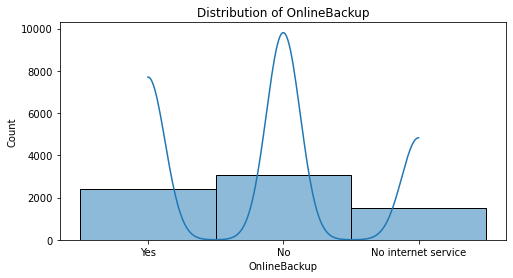

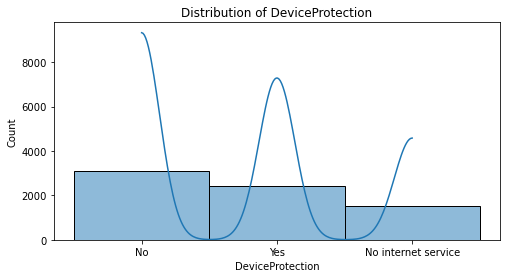

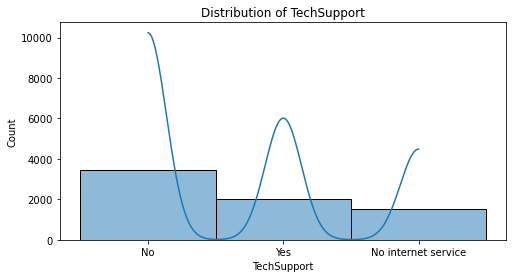

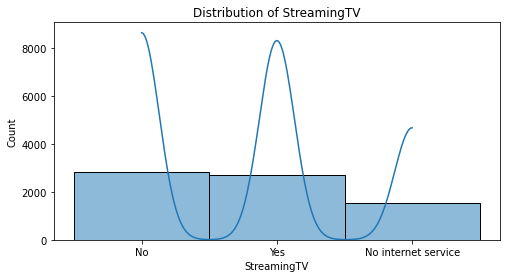

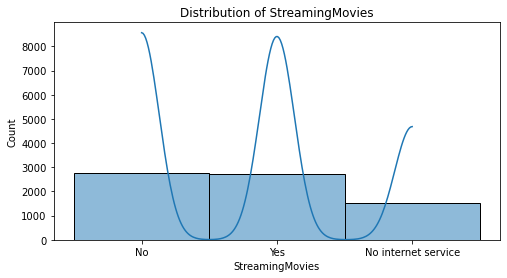

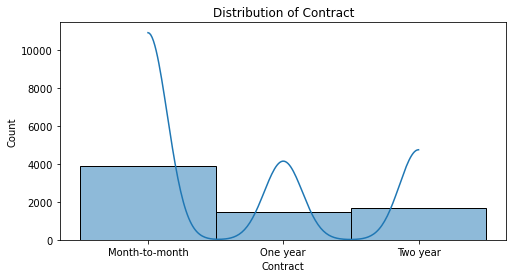

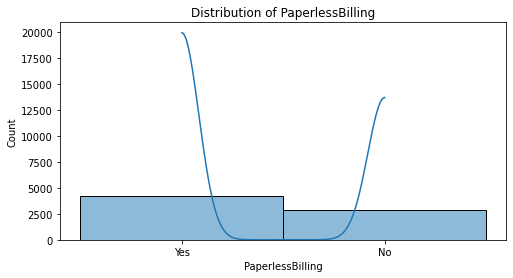

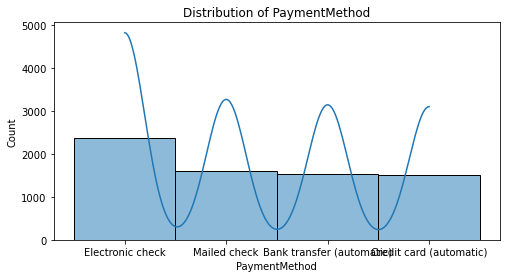

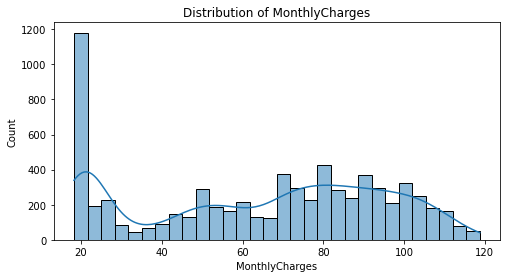

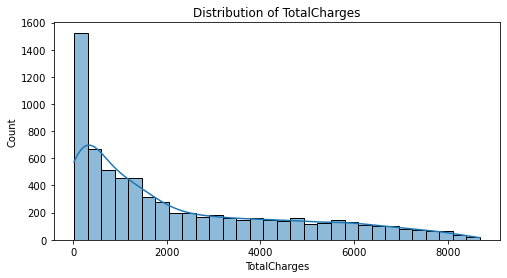

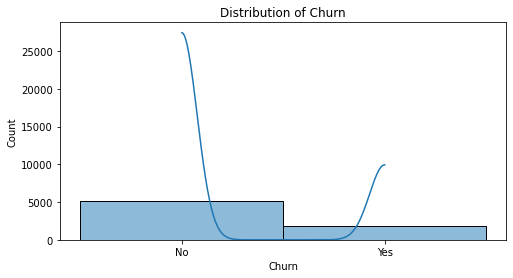

In [17]:
# Plot histograms for each variable
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

We will change object type variables to category to be better operated for analysis later.

In [18]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [29]:
# changing the datatype to be suitable for the characteristics and ideal for future analysis
for c in filter(lambda x: (df[x].dtype == 'O' and df[x].nunique() <=4) or x=='SeniorCitizen', df.columns):
    df[c] = df[c].astype("category")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [21]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### 3.3 Binning of TotalCharges Variable
The distribution of TotalCharges appears to be right-skewed with a long tail extending towards the higher values. This kind of distribution can influence the performance of customer analytical techniques that we are going to use in the future that are sensitive to the scale of data or that assume a normal distribution. Hence, we will conduct binning to resolve this.

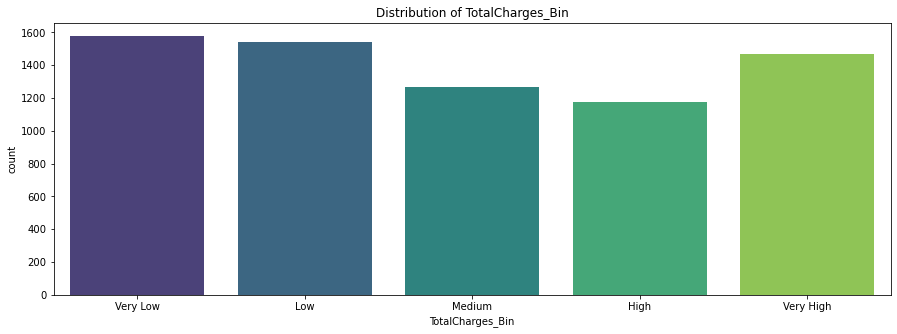

Very Low     1578
Low          1543
Very High    1467
Medium       1267
High         1177
Name: TotalCharges_Bin, dtype: int64

In [22]:
df.TotalCharges.nunique()

# Convert 'TotalCharges' to numeric, setting errors to NaN for non-numeric entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values in 'TotalCharges' with the median of the column
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Calculate the min, max, and mean for 'TotalCharges'
tmp_min = df['TotalCharges'].min()
tmp_max = df['TotalCharges'].max()
tmp_mean = df['TotalCharges'].mean()

# Define bins using the same intervals but encoded differently
bin_edges = [tmp_min, tmp_mean / 7, tmp_mean / 2, tmp_mean, tmp_max / 2, tmp_max]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Use pd.cut to bin 'TotalCharges' with the new labels
df['TotalCharges_Bin'] = pd.cut(df['TotalCharges'], bins=bin_edges, labels=labels, include_lowest=True)

# Display the first few rows to verify
df[['TotalCharges', 'TotalCharges_Bin']].head()

# Show the value counts for each bin
value_counts = df['TotalCharges_Bin'].value_counts()

# Plot the distribution of the binned 'TotalCharges' variable
plt.figure(figsize=(15, 5))
sns.countplot(x='TotalCharges_Bin', data=df, palette="viridis", order=labels)
plt.xlabel("TotalCharges_Bin")
plt.title("Distribution of TotalCharges_Bin")
plt.show()

# Display the value counts
value_counts

As shown from the distribution plot above, the distribution was right-skewed for TotalCharges Variable. To solve this, the TotalCharges variable was divided into five categories based on specific intervals derived from its statistical properties, such as the mean and maximum values. The bins were defined as follows:

1. Very Low: Minimum to one-seventh of the mean.
2. Low: One-seventh of the mean to half of the mean.
3. Medium: Half of the mean to the mean.
4. High: Mean to half of the maximum.
5. Very High: Half of the maximum to the maximum.

This binning approach was selected to create meaningful categories that segment the data based on key thresholds, providing insight into different levels of total charges incurred by customers.

Results of Binning
The distribution of TotalCharges across these categories was relatively balanced, as shown in the visualization.

Each bin contains a similar number of observations, which indicates that the intervals effectively captured the range of values while ensuring an even distribution.
By using these specific thresholds, the bins provide a clear segmentation that avoids heavily skewing the data towards any particular category.

## 4. Checking Preprocessed Dataset

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Very Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Very Low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Very Low


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   int64   
 16  PaperlessBilling  7032 n

In [26]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## 5. Importing Preprocessed Dataset

In [27]:
# Save the cleaned DataFrame to the specified local path
local_file_path = '/Users/JOOYEON/Documents/telco_customer_data_cleaned.csv'
df.to_csv(local_file_path, index=False)

# Confirm the file has been saved
local_file_path

'/Users/JOOYEON/Documents/telco_customer_data_cleaned.csv'